**NAME-** DEESHANT SHARMA

**LAB SESSION-** 12

**ROLL NO.-** EE21MTECH14002

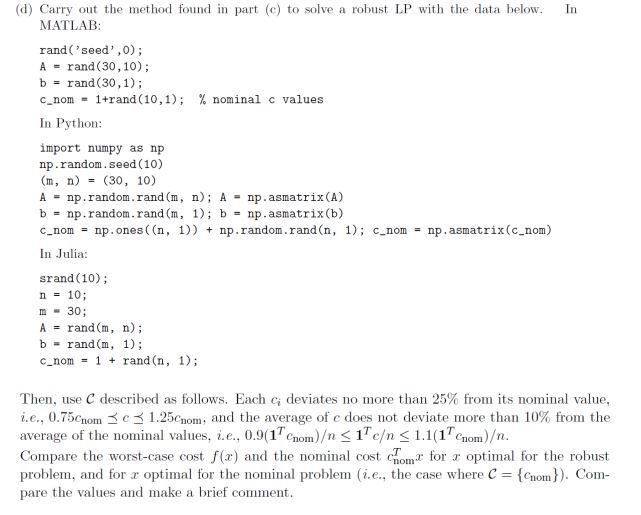

In [ ]:
import cvxpy as cvx
import numpy as np

In [ ]:
np.random.seed(10)
(m, n) = (30, 10)
A = np.random.rand(m, n); A = np.asmatrix(A)
b = np.random.rand(m, 1); b = np.asmatrix(b)
c_nom = np.ones((n, 1)) + np.random.rand(n, 1); c_nom = np.asmatrix(c_nom)

In [ ]:
F = np.r_[np.eye(n), -np.eye(n), np.ones((1, n))/n, -np.ones((1, n))/n]
g = np.r_[1.25*c_nom, -0.75*c_nom, 1.1*sum(c_nom)/n, -0.9*sum(c_nom)/n]
lam = cvx.Variable((g.size,1))
x = cvx.Variable((n,1))
const = [A*x>=b, F.T*lam==x, lam>=0]
cvx.Problem(cvx.Minimize(lam.T*g), const).solve()
x_rob = x.value
const = [A*x>=b]
cvx.Problem(cvx.Minimize(c_nom.T*x), const).solve()
x_nom = x.value
print(f'For x_nom and x_rob')
print(f"nominal costs are {float(c_nom.T*x_nom):.4f},and {float(c_nom.T*x_rob):.4f}")
c = cvx.Variable((n,1))
f_x_nom = cvx.Problem(cvx.Maximize(c.T*x_nom), [F*c<=g]).solve()
f_x_rob = cvx.Problem(cvx.Maximize(c.T*x_rob), [F*c<=g]).solve()
print(f"worst-case costs are {f_x_nom:.4f}, and {f_x_rob:.4f}")

For x_nom and x_rob
nominal costs are 2.1093,and 2.5232
worst-case costs are 7.2216, and 3.1660
